# Question 2

This notebook investigates the pulsatility data.

## Load data

In [1]:
import os
from cycler import cycler

import arviz as az
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sphincter.data_preparation import load_prepared_data
from sphincter.plotting import plot_obs, plot_predictive

CMAP = plt.get_cmap('Set2')

plt.rcParams['axes.prop_cycle'] = cycler(color=CMAP.colors)

In [2]:
PLOTS_DIR = os.path.join("..", "plots")

full_data = load_prepared_data("../data/prepared/pulsatility.json")
no_hyper_data = load_prepared_data("../data/prepared/pulsatility-no-hyper.json")

mts, mts_full = no_hyper_data.measurements, full_data.measurements

In [3]:
raw = pd.read_csv("../data/raw/data_sphincter_paper.csv")

## Plot measurements

The next cell plots the full dataset

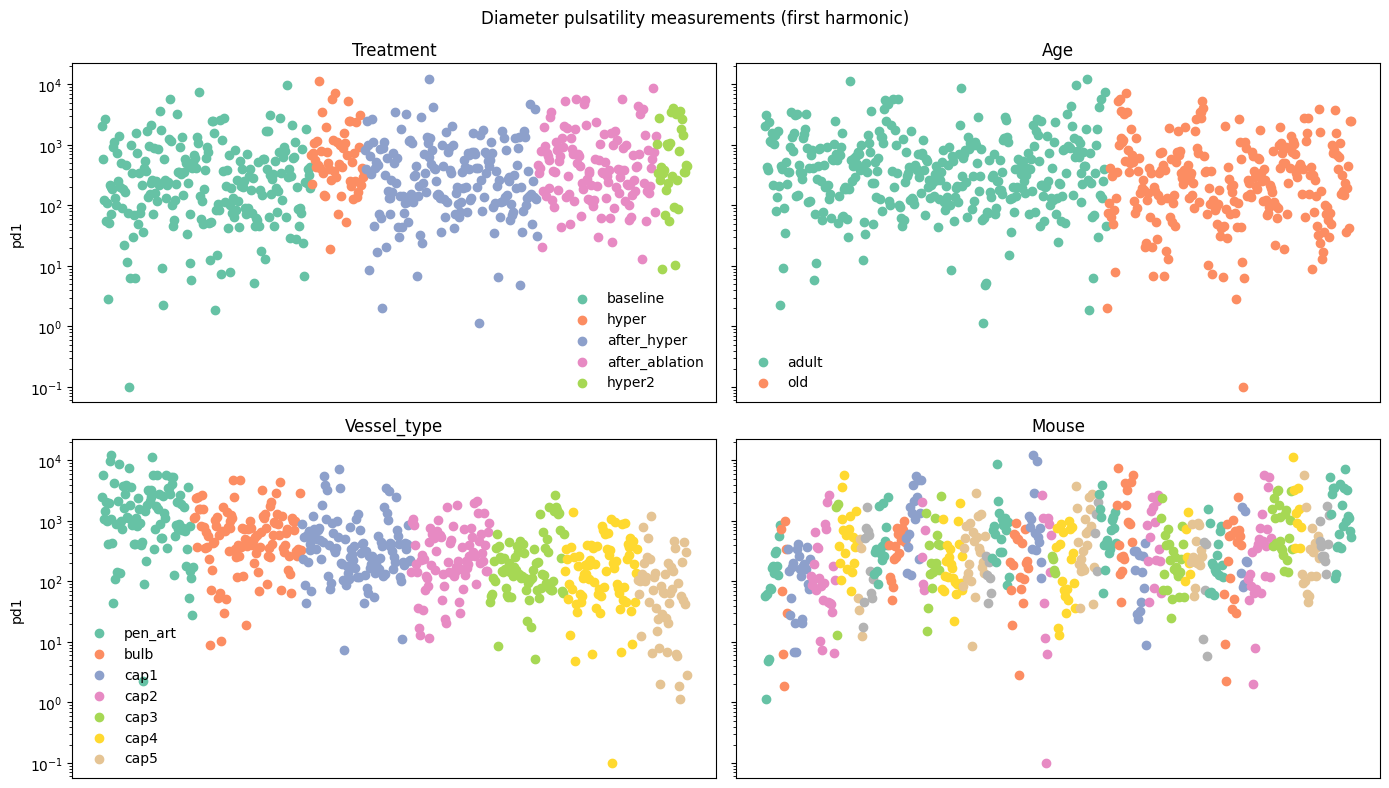

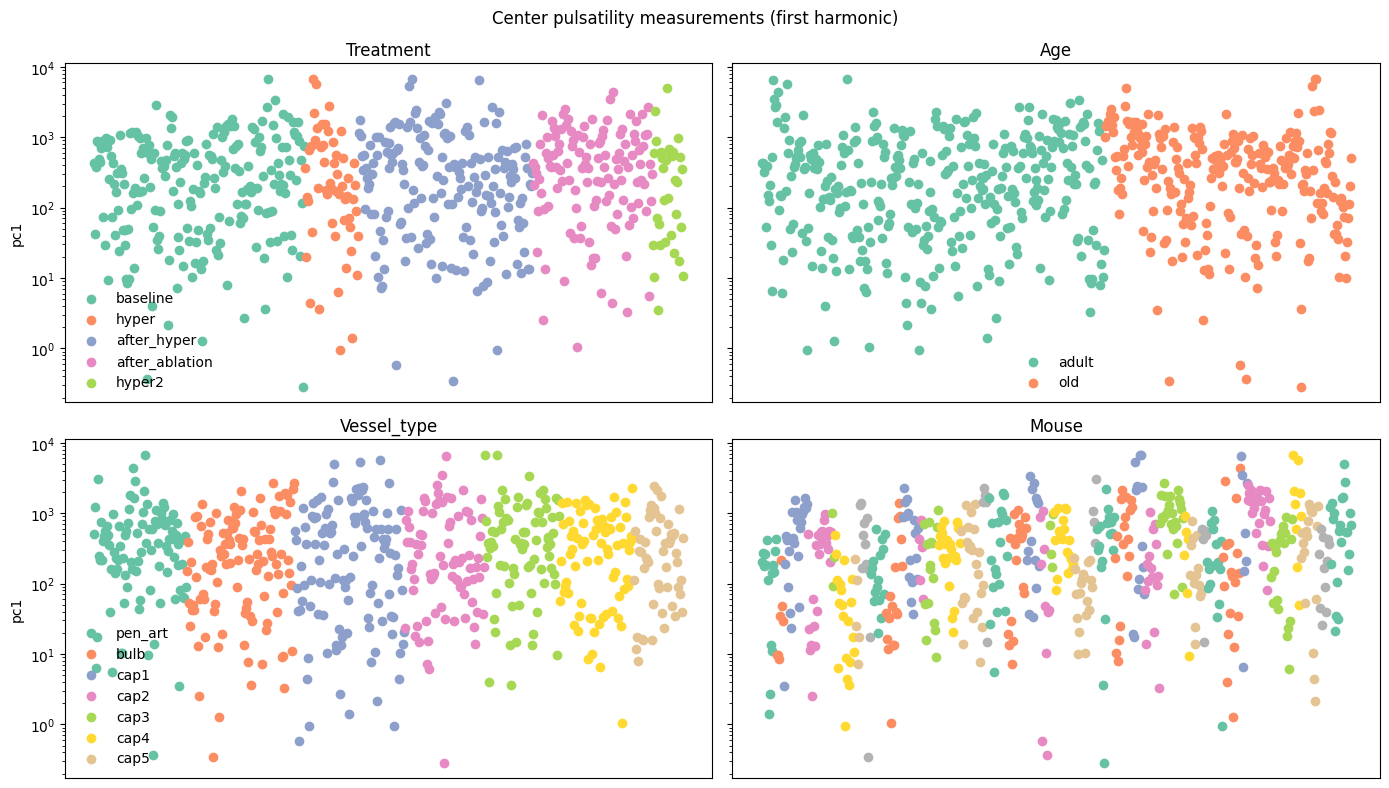

In [4]:
df = mts_full

for obscol, obsname in zip(["pd1", "pc1"], ["diameter", "center"]):

    f, axes = plt.subplots(2, 2, figsize=[14, 8], sharey=True)
    axes = axes.ravel()
    for (i, ax), col in zip(enumerate(axes), ["treatment", "age", "vessel_type", "mouse"]):
        scts = plot_obs(ax, df[obscol], df[col])
        if col != "mouse":
            ax.legend(frameon=False);
        if i % 2 == 0:
            ax.set_ylabel(obscol);
        ax.set_xticks([])
        ax.set_title(col.capitalize())
        ax.semilogy()
    f.suptitle(f"{obsname.capitalize()} pulsatility measurements (first harmonic)");
    f.tight_layout()

In [5]:
mts_full.groupby(["treatment", "vessel_type"], observed=True)["pd1"].mean().unstack("vessel_type")

vessel_type,pen_art,bulb,cap1,cap2,cap3,cap4,cap5
treatment,,,,,,,
baseline,2146.806242,795.089967,454.309280,342.961339,218.385227,238.825968,135.021196
hyper,1937.003032,701.891167,1234.984587,NaN,NaN,NaN,NaN
after_hyper,1776.592497,860.829912,515.044594,386.572631,450.903188,200.802966,161.915522
after_ablation,2738.340987,1264.858326,885.310047,612.347141,383.999886,357.696310,149.583832
hyper2,2025.397486,712.180536,570.411606,NaN,NaN,NaN,NaN


In [6]:
mts_full.groupby(["treatment", "vessel_type"], observed=True)["pd1"].size().unstack("vessel_type")

vessel_type,pen_art,bulb,cap1,cap2,cap3,cap4,cap5
treatment,,,,,,,
baseline,26.0,33.0,32.0,34.0,31.0,34.0,25.0
hyper,18.0,22.0,15.0,NaN,NaN,NaN,NaN
after_hyper,24.0,28.0,32.0,26.0,27.0,24.0,16.0
after_ablation,18.0,17.0,20.0,21.0,19.0,17.0,10.0
hyper2,9.0,10.0,13.0,NaN,NaN,NaN,NaN


In [7]:
mts_full.groupby(["treatment", "vessel_type"], observed=True)["pc1"].mean().unstack("vessel_type")

vessel_type,pen_art,bulb,cap1,cap2,cap3,cap4,cap5
treatment,,,,,,,
baseline,575.687529,531.346937,416.196610,420.768973,805.089140,489.631678,400.602820
hyper,722.127381,343.997693,1029.116044,NaN,NaN,NaN,NaN
after_hyper,606.861146,439.706804,705.150492,682.198898,794.114343,433.111030,437.938622
after_ablation,701.397424,631.436286,504.723183,762.539815,684.673692,527.103255,587.612959
hyper2,343.975114,267.421335,807.869143,NaN,NaN,NaN,NaN


In order to go one step at a time I'm going to first look at the data excluding the hypertension case. 

Here's the same plot for this reduced dataset.

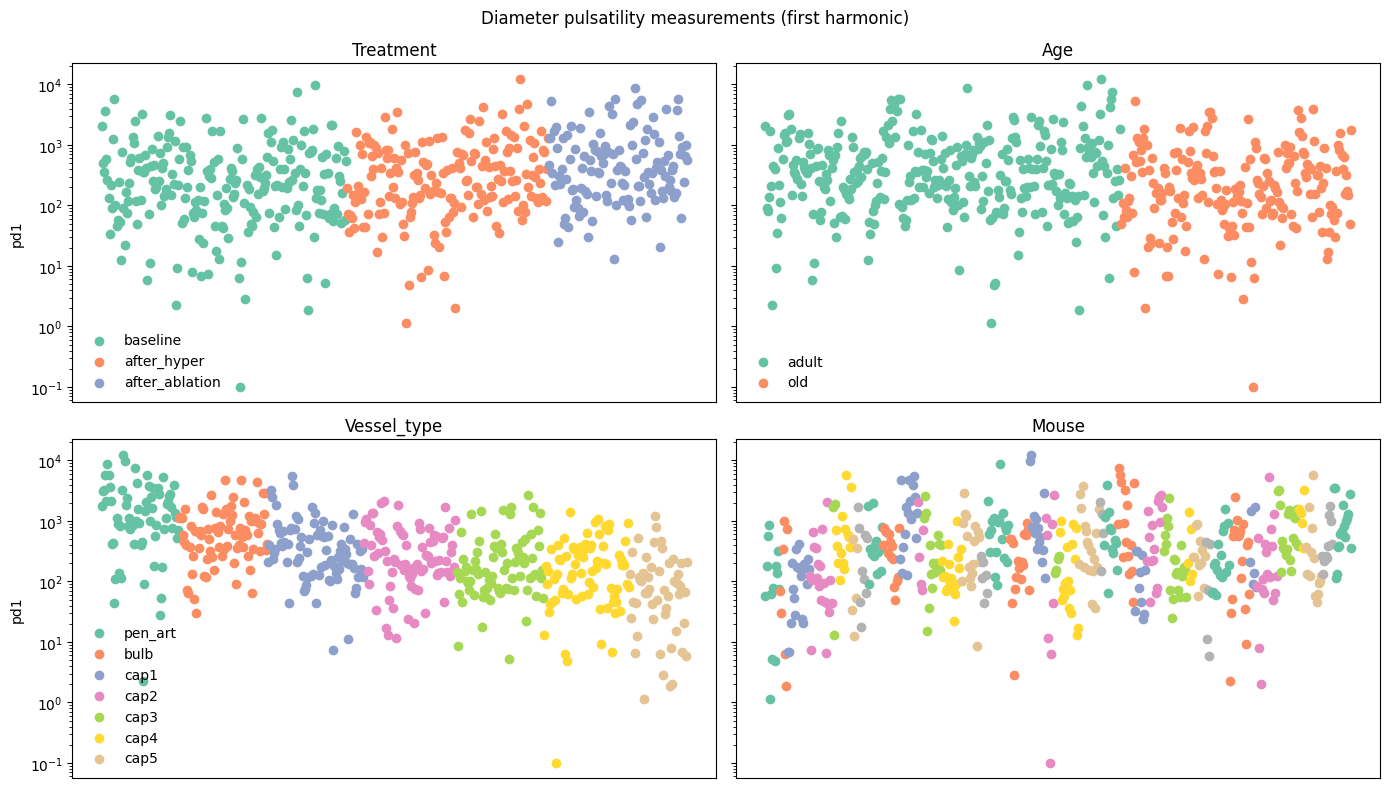

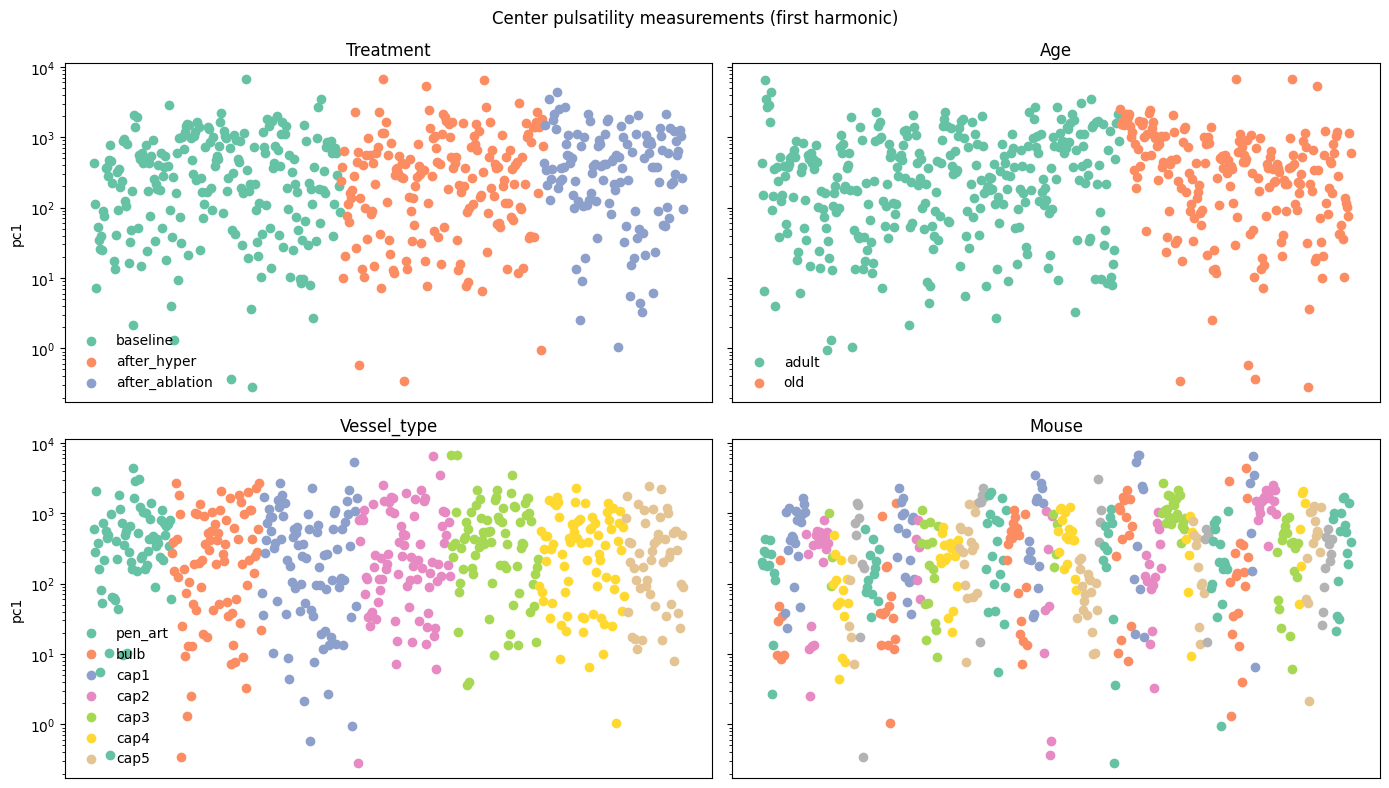

In [8]:
df = mts

for obscol, obsname in zip(["pd1", "pc1"], ["diameter", "center"]):

    f, axes = plt.subplots(2, 2, figsize=[14, 8], sharey=True)
    axes = axes.ravel()
    for (i, ax), col in zip(enumerate(axes), ["treatment", "age", "vessel_type", "mouse"]):
        scts = plot_obs(ax, df[obscol], df[col])
        if col != "mouse":
            ax.legend(frameon=False);
        if i % 2 == 0:
            ax.set_ylabel(obscol);
        ax.set_xticks([])
        ax.set_title(col.capitalize())
        ax.semilogy()
    f.suptitle(f"{obsname.capitalize()} pulsatility measurements (first harmonic)");
    f.tight_layout()
    f.savefig(os.path.join(PLOTS_DIR, "pulsatility-{obsname}-measurements.png"), bbox_inches="tight")

There is a clear pattern for the diameter power harmonics to get lower with the order of the vessel.

The treatment regime seems to make the diameter measurements closer together and somewhat higher.

The center power harmonics have an interesting cluster: one old mice seems to have had consistently high measurements.

The next cell gets that mouse's id and displays all of its center power harmonic measurements.


In [9]:
mts.loc[
    lambda df: df["mouse"] == mts.groupby("mouse", observed=True)["pc1"].max().idxmax(),
    ["age", "mouse", "vessel_type", "pd1", "pc1", "pressure_d"]
]

,age,mouse,vessel_type,pd1,pc1,pressure_d
1155,old,200820,bulb,155.643095,17.588219,44.730375
1143,old,200820,bulb,314.829290,19.476556,47.302121
1156,old,200820,cap1,321.307043,5394.333862,44.690442
1144,old,200820,cap1,79.023271,339.436304,47.258566
1158,old,200820,cap3,144.224951,6749.712200,44.807104
1146,old,200820,cap3,45.345324,6612.926165,47.289996
1159,old,200820,cap4,32.766022,114.552898,44.836661
1147,old,200820,cap4,275.720747,83.570348,46.707032
1160,old,200820,cap5,24.215271,2424.941861,44.777698
1148,old,200820,cap5,28.978164,2171.428497,46.434238


There is also a blood pressure measurement for each datapoint. The next plot shows that there isn't an obvious correlation between pressure and our measurements.

NOTE: try coarsening the data by binning.

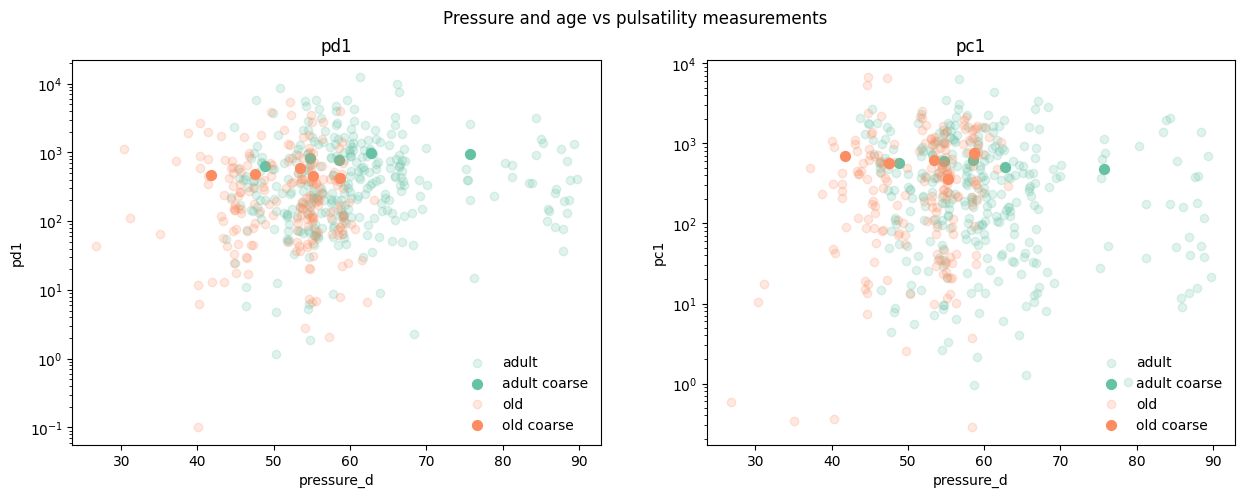

In [10]:
f, axes = plt.subplots(1, 2, figsize=[15, 5]);

col = "pressure_d"
groupcol = "age"


def plots_with_bins_and_groups(axes, mts, col, groupcol):
    for ax, ycol in zip(axes, ["pd1", "pc1"]):
        for treatment, subdf in mts.dropna(subset=col).groupby(groupcol, observed=True):
            bins = pd.qcut(subdf[col], 5)
            coarse = subdf.groupby(bins, observed=True)[[col, ycol]].mean()
            sct = ax.scatter(subdf[col], subdf[ycol], label=treatment, alpha=0.2);
            ax.scatter(
                coarse[col], 
                coarse[ycol], 
                marker="o", 
                label=treatment + " coarse", 
                color=sct.get_facecolor(),
                alpha=1,
                s=50
            );
        ax.legend(frameon=False)
        ax.semilogy();
        ax.set(title=ycol, xlabel=col, ylabel=ycol);
        # ax.semilogx();
    return axes

plots_with_bins_and_groups(axes, mts, col, groupcol);
f.suptitle("Pressure and age vs pulsatility measurements");
f.savefig(os.path.join(PLOTS_DIR, "pressure-data.png"), bbox_inches="tight")

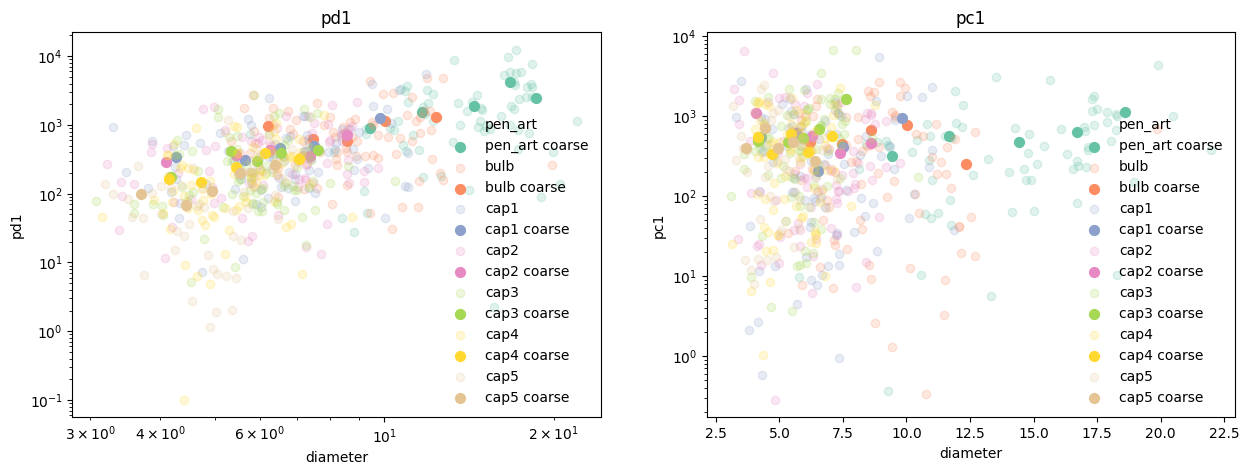

In [11]:
f, axes = plt.subplots(1, 2, figsize=[15, 5])

plots_with_bins_and_groups(axes, mts, "diameter", "vessel_type");
axes[0].semilogx();
f.savefig(os.path.join(PLOTS_DIR, "pulsatility-diameter-data.png"), bbox_inches="tight")

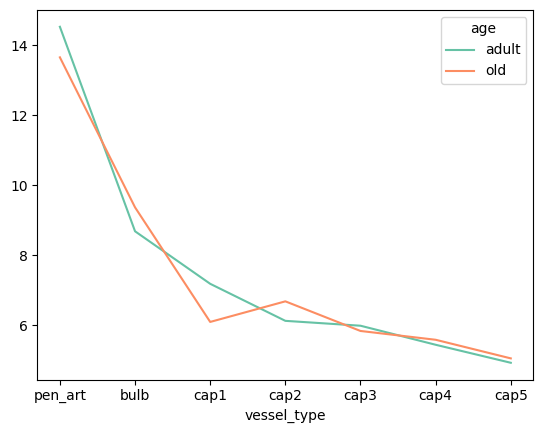

In [12]:
mts.groupby(["age", "vessel_type"], observed=True)["diameter"].mean().unstack("age").plot();

There are no measurements beyond cap1 for the hyper or hyper2 treatments:

In [13]:
mts_full.groupby(["treatment", "vessel_type"], observed=True).size().unstack()

vessel_type,pen_art,bulb,cap1,cap2,cap3,cap4,cap5
treatment,,,,,,,
baseline,26.0,33.0,32.0,34.0,31.0,34.0,25.0
hyper,18.0,22.0,15.0,NaN,NaN,NaN,NaN
after_hyper,24.0,28.0,32.0,26.0,27.0,24.0,16.0
after_ablation,18.0,17.0,20.0,21.0,19.0,17.0,10.0
hyper2,9.0,10.0,13.0,NaN,NaN,NaN,NaN


## Speed

Where possible,  the speed of red blood cells through the vessels was also measured.

The next few cells look at how many speed measurements are available, how speed is distributed depending on age and vessel type, and how measured speed is related to pulsatility.

In [14]:
pd.DataFrame(
    {
        "measurements with speed": mts.groupby(["vessel_type"], observed=True)["speed"].count(), 
        "total measurements": mts.groupby("vessel_type", observed=True).size(),
        "mean speed": mts.groupby("vessel_type", observed=True)["speed"].mean(),
    }
)

,measurements with speed,total measurements,mean speed
vessel_type,,,
pen_art,0,68,NaN
bulb,58,78,2.623062
cap1,38,84,3.410909
cap2,28,81,2.801351
cap3,25,77,1.933947
cap4,21,75,1.654914
cap5,12,51,0.985873


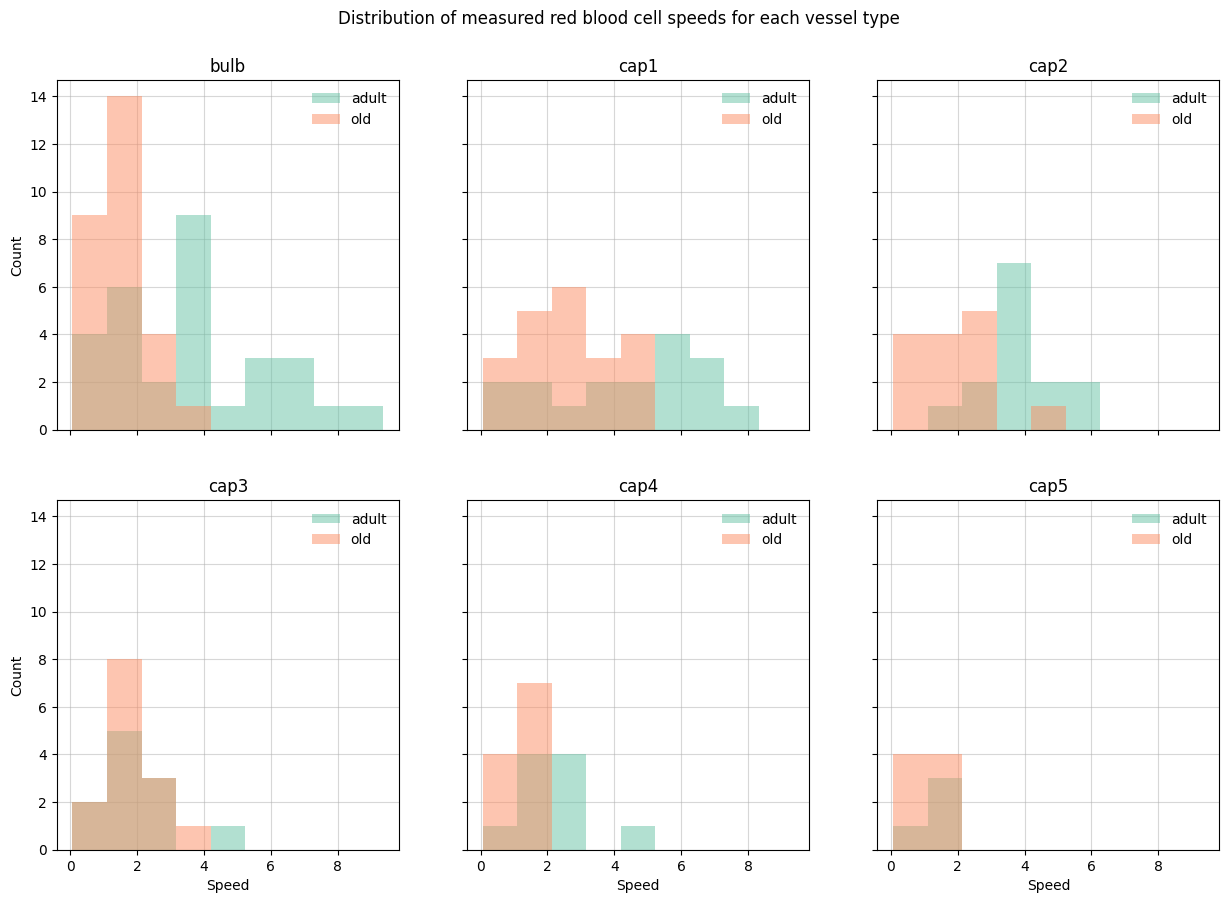

In [15]:
f, axes = plt.subplots(2, 3, figsize=[15, 10], sharex=True, sharey=True)
axes = axes.ravel()
bins=np.linspace(mts["speed"].min(), mts["speed"].max(), 10)

for ax, (vt, subdf) in zip(axes, mts.dropna(subset="speed").groupby(["vessel_type"], observed=True)):
    ax.grid(alpha=0.5)
    for t, subsubdf in subdf.groupby("age", observed=True):
        ax.hist(subsubdf["speed"], alpha=0.5, bins=bins, label=t, stacked=True);
    ax.set_axisbelow(True)
    ax.set(title=vt[0])
    ax.legend(frameon=False)
for ix in [0, 3]:
    axes[ix].set_ylabel("Count")
for ix in [3, 4, 5]:
    axes[ix].set_xlabel("Speed")
f.suptitle("Distribution of measured red blood cell speeds for each vessel type", y=0.95);

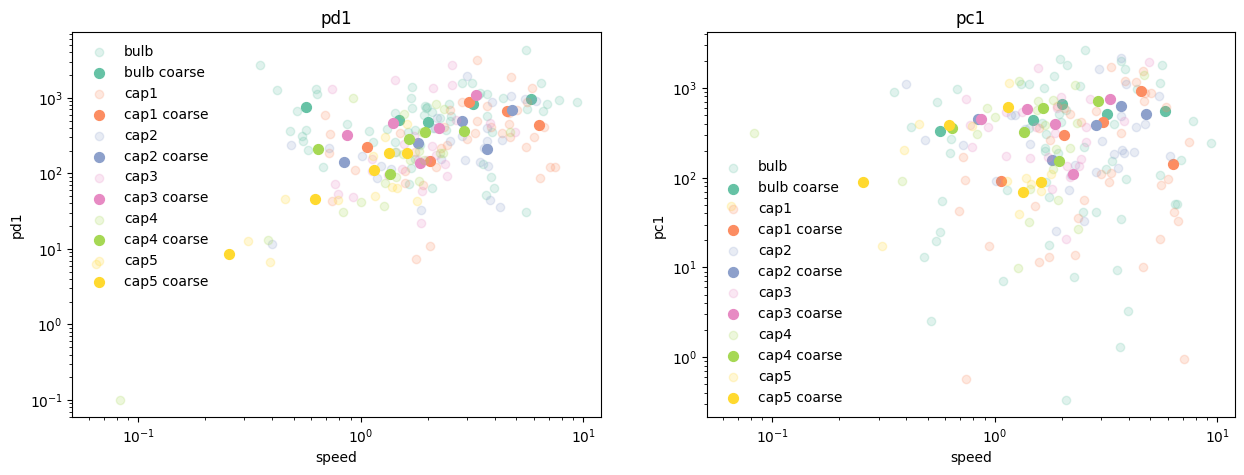

In [16]:
f, axes = plt.subplots(1, 2, figsize=[15, 5])
plots_with_bins_and_groups(axes, mts, "speed", "vessel_type");
axes[0].semilogx();
axes[1].semilogx();

## Models

The first model I fit to this dataset predicts diameter and center power harmonics independently and in the same way, using the sum of four (also independent) parameters: an intercept $\mu$, an age effect $\alpha^{age}$ a treatment effect $\alpha^{treatment}$ and a vessel type effect $\alpha^{vessel\ type}$. The model creates a linear predictor out of these parameters for each measurement and fits it using an exponential GLM.

I called this model the "basic" model.

The next cell loads the results of fitting the basic model and runs a diagnostic to estimate its out of sample predictive performance. The main output metric (`elpd_loo`) is in principle absolute, representing the estimated total out of sample log likelihood under leave-one-out cross validation. However, this doesn't mean too much in isolation as it isn't clear in advance what would be a good without another model to compare with. Still, the fact that the check runs without warnings is a good sign, indicating that there weren't many very influential observations.

In [17]:
idatas = {
    "pulsatility-basic": az.InferenceData.from_zarr(os.path.join("..", "inferences", "pulsatility-basic", "idata")),
    "pulsatility-interaction": az.InferenceData.from_zarr(os.path.join("..", "inferences", "pulsatility-interaction", "idata")),
    "pulsatility-pressure": az.InferenceData.from_zarr(os.path.join("..", "inferences", "pulsatility-pressure", "idata")),
    "pulsatility-pressure-no-age": az.InferenceData.from_zarr(os.path.join("..", "inferences", "pulsatility-pressure-no-age", "idata"))
}
cmp = az.compare(idatas)
cmp

/Users/tedgro/repos/teddygroves/sphincter/.venv/lib/python3.12/site-packages/arviz/stats/stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/Users/tedgro/repos/teddygroves/sphincter/.venv/lib/python3.12/site-packages/arviz/stats/stats.py:307: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_comp.loc[val] = (
/Users/tedgro/repos/teddygroves/sphincter/.venv/lib/python3.12/site-packages/arviz/stats/stats.py:307: FutureWarning: Setting an item of incompatible dtype 

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
pulsatility-pressure,0,-486.959957,34.964023,0.000000,5.605327e-01,47.119492,0.000000,False,log
pulsatility-basic,1,-487.445767,29.969107,0.485810,2.891457e-01,46.441768,3.417980,False,log
pulsatility-interaction,2,-489.467800,36.234636,2.507842,1.942890e-16,46.405527,3.797631,True,log
pulsatility-pressure-no-age,3,-499.281187,28.046515,12.321230,1.503216e-01,46.409187,6.800656,False,log


In [18]:
for name, idata in idatas.items():
    print(f"Number of diverging transitions for {name} model: " +  str(idata.sample_stats.diverging.values.sum()))

Number of diverging transitions for pulsatility-basic model: 0
Number of diverging transitions for pulsatility-interaction model: 0
Number of diverging transitions for pulsatility-pressure model: 7
Number of diverging transitions for pulsatility-pressure-no-age model: 0


In [19]:
loo = az.loo(idatas["pulsatility-pressure"], pointwise=True)
loo

Computed from 4000 posterior samples and 514 observations log-likelihood matrix.

         Estimate       SE
elpd_loo  -486.96    47.12
p_loo       34.96        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)      509   99.0%
 (0.5, 0.7]   (ok)          5    1.0%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%

/Users/tedgro/repos/teddygroves/sphincter/.venv/lib/python3.12/site-packages/arviz/plots/backends/matplotlib/compareplot.py:87: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  scale = comp_df["scale"][0]


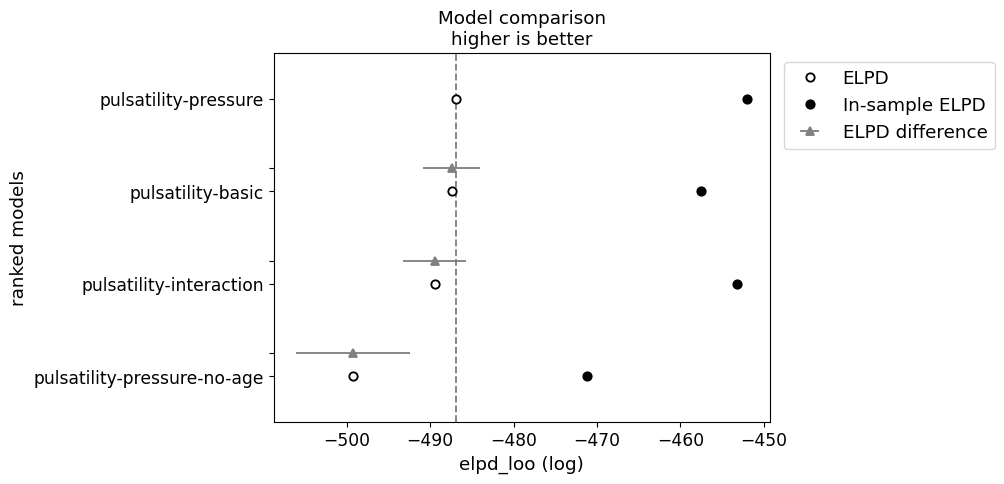

In [20]:
f, ax = plt.subplots()
az.plot_compare(cmp, insample_dev=True, ax=ax, plot_standard_error=False);
f.savefig(os.path.join(PLOTS_DIR, "pulsatility-elpd-comparison.png"), bbox_inches="tight")

The next cell plots the marginal distributions of the basic model's main parameters.

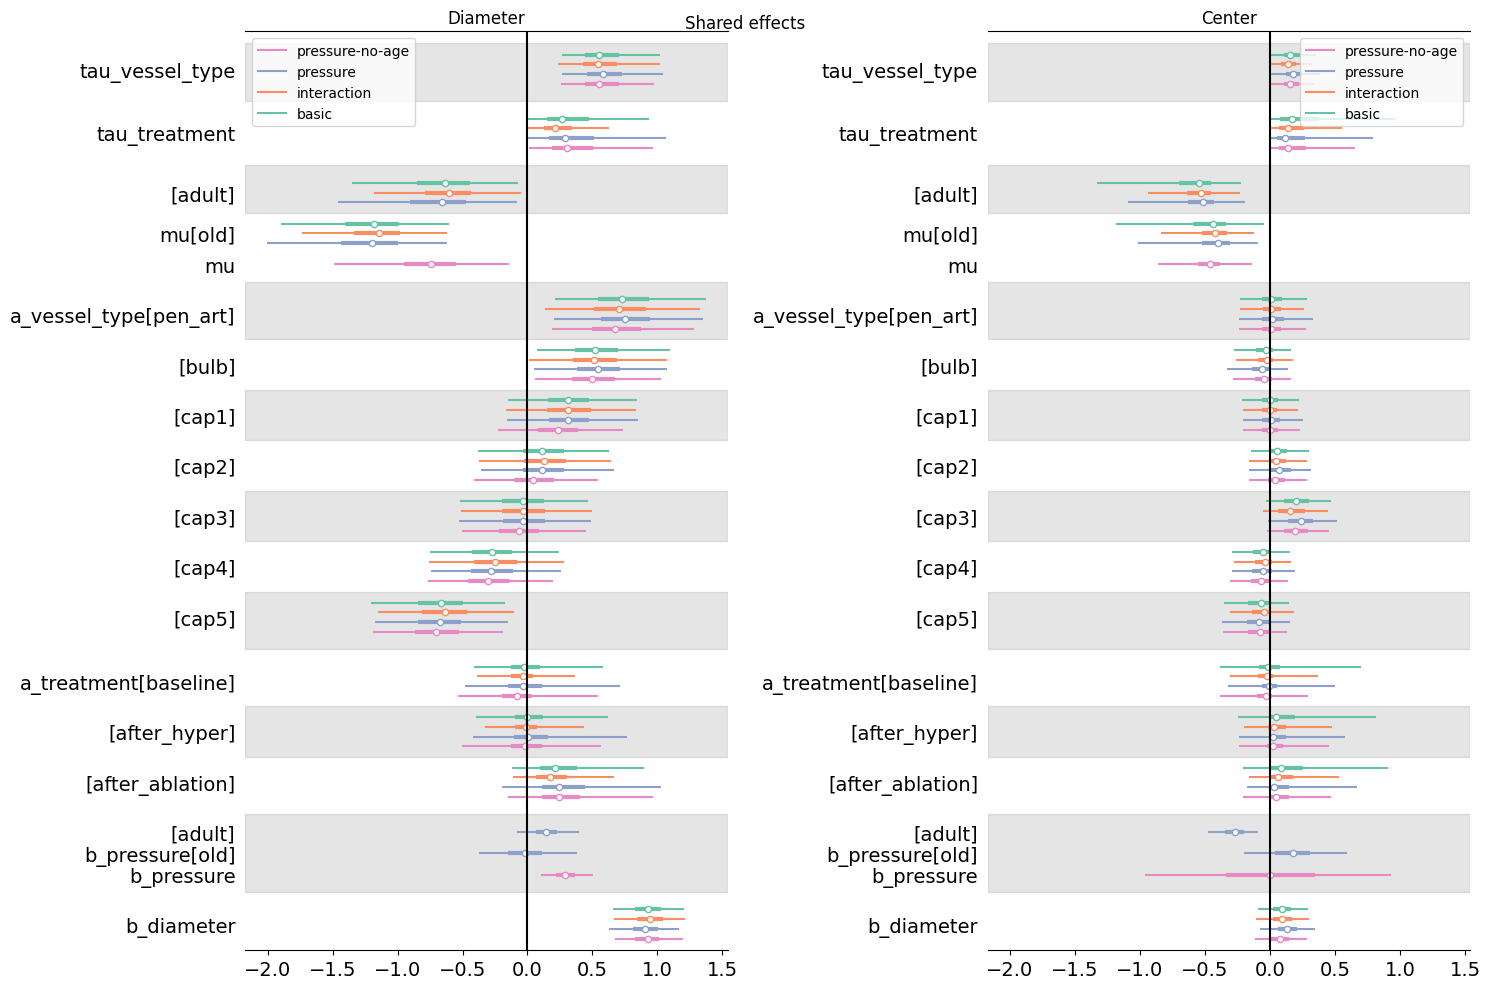

In [21]:
vars = ["tau_vessel_type", "tau_treatment", "mu", "a_vessel_type", "a_treatment", "b_pressure", "b_diameter"]
f, axes = plt.subplots(1, 2, figsize=[15, 10], sharex=True)
for ax, mt in zip(axes, ["diameter", "center"]):
    az.plot_forest(
        [idatas["pulsatility-basic"], idatas["pulsatility-interaction"], idatas["pulsatility-pressure"], idatas["pulsatility-pressure-no-age"]],
        model_names=["basic", "interaction", "pressure", "pressure-no-age"], 
        combined=True, 
        ax=ax,
        var_names=vars,
        coords={"measurement_type": mt}
    );
    ax.axvline(0, color="black")
    ax.set(title=mt.capitalize())
f.tight_layout()
f.suptitle("Shared effects")
f.savefig(os.path.join(PLOTS_DIR, "pulsatility-effects.png"), bbox_inches="tight")

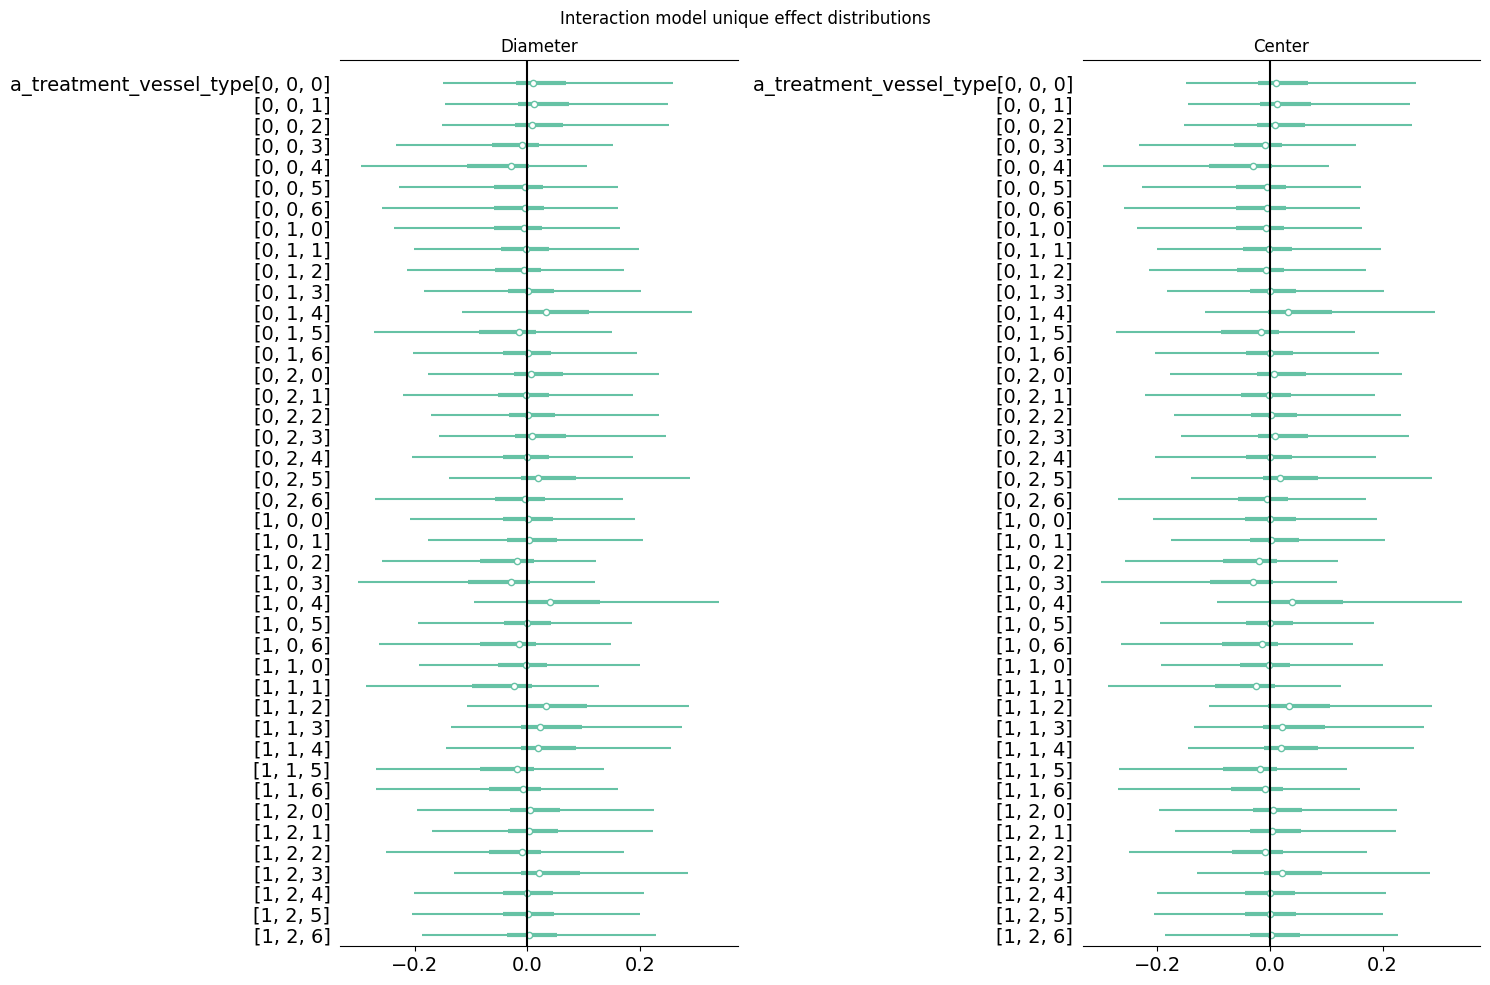

In [24]:
vars = ["a_treatment_vessel_type"]
f, axes = plt.subplots(1, 2, figsize=[15, 10], sharex=True)
for ax, mt in zip(axes, ["diameter", "center"]):
    az.plot_forest(idatas["pulsatility-interaction"], combined=True, ax=ax, var_names=vars, coords={"measurement_type": mt});
    ax.axvline(0, color="black")
    ax.set(title=mt.capitalize())
f.suptitle("Interaction model unique effect distributions")
f.tight_layout()
f.savefig(os.path.join(PLOTS_DIR, "pulsatility-interaction-effects.png"), bbox_inches="tight")

The next cell does a posterior predictive check, comparing measurements simulated using the model with the actually realised observations.

This shows an overall fairly good fit, though there are quite a few extreme center measurements that the model can't capture, and it seems to underfit for some mice as a result.

In [ ]:
mt_to_obs = {"diameter": mts["pd1"], "center": mts["pc1"]}
cmap = mpl.colormaps["Set2"]

for mt in ["diameter", "center"]:
    for group, mode in zip(
        [idatas["pulsatility-pressure"].prior_predictive, idatas["pulsatility-pressure"].posterior_predictive], 
        ["prior", "posterior"]
    ):
        yrep = group.sel(measurement_type=mt)["yrep"]
        obs = mt_to_obs[mt]
        f, axes = plt.subplots(2, 2, figsize=[16, 8], sharey=True)
        axes = axes.ravel()
        for (i, ax), col in zip(enumerate(axes), ["treatment", "age", "vessel_type", "mouse"]):
            scts = plot_obs(ax, obs, mts[col])
            lines = plot_predictive(ax, yrep, mts[col], zorder=-1, label="model")
            if col != "mouse":
                ax.legend(scts + [lines], list(mts[col].cat.categories) + ["model"], frameon=False, bbox_to_anchor=[1,0.5], loc="center left");
            if i % 2 == 0:
                ax.set_ylabel("pd1");
            ax.set_xticks([])
            ax.set_title(col.capitalize())
            ax.semilogy()
            ax.set_ylim(1e-2, 1e5)
        f.suptitle(f"{mt.capitalize()} pulsatility measurements (first harmonic) vs {mode} simulations");
        f.tight_layout()
        f.savefig(os.path.join(PLOTS_DIR, f"pulsatility-{mode}-check-{mt}.png"), bbox_inches="tight")

In [ ]:
idatas["pulsatility-pressure"].prior_predictive["yrep"].sel(measurement_type="diameter").quantile([0.01, 0.99])

In [ ]:
f, ax = plt.subplots()
ax.hist(np.log(idatas["pulsatility-pressure"].prior_predictive["yrep"].values.flatten()), bins=100);
ax.semilogy()

The next cell plots the differences in age effects for each measurement type in the basic model. 

The plots show that, according to the basic model, diameter power harmonics tended to be higher for adult mice while center harmonics tended to be higher for old mice.

In [ ]:
f, axes = plt.subplots(1, 2, figsize=[12, 5], sharex=True)
f.suptitle("Age effect differences")
for ax, mt in zip(axes, ["diameter", "center"]):
    comp = idatas["pulsatility-pressure"].posterior["mu"].sel(measurement_type=mt, age="adult").values.flatten()
    base = idatas["pulsatility-pressure"].posterior["mu"].sel(measurement_type=mt, age="old").values.flatten()
    pr = ((comp - base) > 0).mean()
    ax.hist(comp - base, bins=30, label=f"\nprob +ve: {pr.round(2)}")
    ax.axvline(0, color="black", linestyle="--", linewidth=0.5);
    ax.legend(frameon=False)
    ax.set(title=mt.capitalize(), xlabel="Difference (adult minus old, arbitrary units)")
f.savefig(os.path.join(PLOTS_DIR, "pulsatility-age-effects.png"), bbox_inches="tight")

In [ ]:
f, axes = plt.subplots(1, 2, figsize=[12, 5], sharex=True)
f.suptitle("Pressure effect differences (adult minus old)")
for ax, mt in zip(axes, ["diameter", "center"]):
    comp = idatas["pulsatility-pressure"].posterior["b_pressure"].sel(measurement_type=mt, age="adult").values.flatten()
    base = idatas["pulsatility-pressure"].posterior["b_pressure"].sel(measurement_type=mt, age="old").values.flatten()
    pr = ((comp - base) > 0).mean()
    ax.hist(comp - base, bins=30, label=f"\nprob +ve: {pr.round(2)}")
    ax.axvline(0, color="black", linestyle="--", linewidth=0.5);
    ax.legend(frameon=False)
    ax.set(title=mt.capitalize(), xlabel="Difference (adult minus old, arbitrary units)")
f.savefig(os.path.join(PLOTS_DIR, "pulsatility-pressure-effects.png"), bbox_inches="tight")

In [ ]:
(
    idatas["pulsatility-pressure"].posterior["b_pressure"].sel(measurement_type=mt, age="adult")
    - idatas["pulsatility-pressure"].posterior["b_pressure"].sel(measurement_type=mt, age="old")
).values.mean()

Graph below: compare the ablation to the after_hyper as that is what immediately happened.

In [ ]:
idatas["pulsatility-pressure"].posterior["a_treatment"]

In [ ]:

f, axes = plt.subplots(1, 2, figsize=[12, 5], sharex=True)
f.suptitle("Effect of ablation relative to after hypertension")
for ax, mt in zip(axes, ["diameter", "center"]):
    comp = idatas["pulsatility-pressure"].posterior["a_treatment"].sel(measurement_type=mt, treatment="after_ablation").values.flatten()
    base = idatas["pulsatility-pressure"].posterior["a_treatment"].sel(measurement_type=mt, treatment="after_hyper").values.flatten()
    pr = ((comp - base) > 0).mean()
    ax.hist(comp - base, bins=30, label=f"\nprob +ve: {pr.round(2)}");
    ax.axvline(0, color="black", linestyle="--", linewidth=0.5);
    ax.set(title=mt.capitalize(), xlabel="Difference (treatment minus baseline, arbitrary units)")
    ax.legend(frameon=False)
axes[0].text(0.4, 200, "The model thinks that\nspincter ablation increases\nthe first diameter harmonic", fontsize="small");
f.savefig(os.path.join(PLOTS_DIR, "pulsatility-treatment-effects.png"), bbox_inches="tight")

# Investigating the hypertension treatments

The models fit above used datasets that excluded the `hyper` and `hyper2` treatments because they were aiming to quantify the effect of pressure under the other treatment states, which is hard when those are considered alongside the extreme pressures from the hypertension treatment. However, we are still interested in those treatments!

To quantify the effect of the hypertension treatments on diameter and center pulsatility, we re-fit our 'basic' model to a dataset including all five treatment states. When fit to the non-hypertension dataset, this model had similar predictive performance and parameter values compared with the models with pressure effects, so we judged that the results would be roughly comparable.

In [ ]:
idatas_full = {
    "basic": az.InferenceData.from_zarr(os.path.join("..", "inferences", "pulsatility-basic-full", "idata")),
    "interaction": az.InferenceData.from_zarr(os.path.join("..", "inferences", "pulsatility-interaction-full", "idata")),
    "lognormal": az.InferenceData.from_zarr(os.path.join("..", "inferences", "pulsatility-interaction-lognormal-full", "idata")),

}


In [ ]:
vars = ["tau_vessel_type", "tau_treatment", "mu", "a_vessel_type", "a_treatment", "b_diameter"]
f, axes = plt.subplots(1, 2, figsize=[15, 10], sharex=True)
for ax, mt in zip(axes, ["diameter", "center"]):
    az.plot_forest(
        [idatas["pulsatility-basic"], idatas_full["basic"], idatas_full["interaction"], idatas_full["lognormal"]],
        model_names=["no hypertension", "all treatments basic", "all treatments interaction", "lognormal"], 
        combined=True, 
        ax=ax,
        var_names=vars,
        coords={"measurement_type": mt}
    );
    ax.axvline(0, color="black")
    ax.set(title=mt.capitalize())
f.tight_layout()
f.suptitle("Shared effects")
f.savefig(os.path.join(PLOTS_DIR, "pulsatility-effects-basic-datasets.png"), bbox_inches="tight")

In [ ]:
az.compare(idatas_full)

In [ ]:
treatment_to_comp = {
    "hyper": "baseline",
    "after_ablation": "after_hyper",
    "hyper2": "after_hyper"
}
idata = idatas_full["lognormal"]

f, axes = plt.subplots(1, 2, figsize=[12, 5], sharex=True)
f.suptitle("Treatment effect differences relative to baseline (basic model with full dataset)")
for ax, mt in zip(axes, ["diameter", "center"]):
    ax.axvline(0, color="black", linestyle="--", linewidth=0.5);
    for treatment in ["after_ablation", "hyper", "hyper2"]:
        if treatment != "baseline":
            comp = idata.posterior["a_treatment"].sel(measurement_type=mt, treatment=treatment).values.flatten()
            base = idata.posterior["a_treatment"].sel(measurement_type=mt, treatment=treatment_to_comp[treatment]).values.flatten()
            pr = ((comp - base) > 0).mean()
            ax.hist(
                comp - base,
                bins=np.linspace((comp-base).min(), (comp-base).max(), 30),
                alpha=0.6,
                label=treatment + f"\nprob +ve: {pr.round(2)}"
            );
    ax.set(title=mt.capitalize(), xlabel="Difference (treatment minus baseline, arbitrary units)")
    ax.legend(frameon=False)
f.savefig(os.path.join(PLOTS_DIR, "pulsatility-treatment-effects-full.png"), bbox_inches="tight")

In [ ]:
f, axes = plt.subplots(1, 2, figsize=[20, 10])

for ax, mt in zip(axes, ["diameter", "center"]):
    az.plot_forest(
        idatas_full["lognormal"],
        combined=True, 
        ax=ax,
        var_names=["a_treatment_vessel_type_z"],
        coords={"measurement_type": mt}
    );

In [ ]:
plt.hist(idatas_full["lognormal"].posterior["tau_treatment_vessel_type"].sel(measurement_type="diameter").values.flatten(), bins=23);

In [ ]:
(
    idatas_full["interaction"].posterior["a_treatment_vessel_type"]
    + idatas_full["interaction"].posterior["a_treatment"]
    + idatas_full["interaction"].posterior["a_vessel_type"]
    + idatas_full["interaction"].posterior["mu"]
).sel(measurement_type="diameter").mean(dim=["chain", "draw"]).to_series().unstack("vessel_type")

In [ ]:
mts_full.groupby(["treatment", "vessel_type"], observed=True)["pd1"].mean().unstack("vessel_type")

In [ ]:
t = idatas_full["interaction"].posterior_predictive["yrep"].sel(measurement_type="diameter").to_series().unstack(["chain", "draw"])
t.index = mts_full.index

t.groupby([mts_full["treatment"], mts_full["vessel_type"]]).mean().mean(axis=1).unstack("vessel_type")

In [ ]:
idata = idatas_full["interaction"]
mt = "diameter"
group = idata.posterior_predictive
mode = "posterior"
vessel_type = "cap1"


obs = mts_full[mt]
yrep = group.sel(measurement_type=mt)["yrep"]



f, axes = plt.subplots(2, 2, figsize=[16, 8], sharey=True)
axes = axes.ravel()
for ax, col in zip(axes, ["treatment", "age", "vessel_type", "mouse"]):
    scts = plot_obs(ax, mts_full[mt], cat=mts_full[col])
    lines = plot_predictive(ax, yrep, cat=mts_full[col], zorder=-1)
    ax.semilogy()
f.suptitle(f"{mt.capitalize()} pulsatility measurements (first harmonic) vs {mode} simulations, only {vessel_type} vessels");
f.tight_layout()
f.savefig(os.path.join(PLOTS_DIR, f"pulsatility-{mode}-full-check-{mt}.png"), bbox_inches="tight")

In [ ]:
mts_full

In [ ]:
obs.index.values